In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import scipy.stats
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller
plt.style.use('fivethirtyeight')
from pmdarima import auto_arima

In [16]:
data_raw = pd.read_csv('df/Index2018.csv')

In [17]:
df = data_raw.copy()

In [18]:
df.date = pd.to_datetime(df.date,dayfirst=True)
df.set_index('date',inplace = True)
# setting frequency
df = df.asfreq('b')
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [19]:
df.spx = df.spx.fillna(method = 'ffill')# front filling(taking previous value)
df.ftse = df.ftse.fillna(method = 'bfill')# back filling(taking next value)
df.dax = df.dax.fillna(df.dax.mean())
df.nikkei = df.nikkei.fillna(method = 'ffill')

In [20]:
df.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [21]:
ftse_df = df.ftse
size = int(len(ftse_df)*0.8)
ftse_train = ftse_df.iloc[:size]
ftse_test = ftse_df.iloc[size:]

In [37]:
spx_df = df.spx

In [22]:
def llr(mod1,mod2,deg = 1):
    l1 = mod1.fit().llf
    l2 = mod2.fit().llf
    lr = 2*(l2-l1)
    p = chi2.sf(lr,deg)
    return p

In [40]:
returns = spx_df.pct_change().mul(100)

In [41]:
returns=returns.dropna()

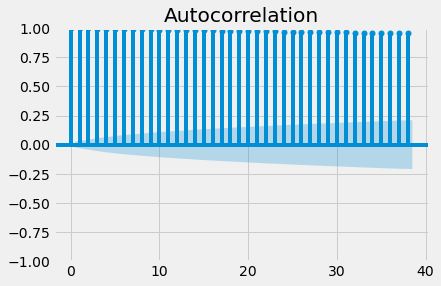

In [39]:
plot_acf(spx_df);

C:\Users\vasee\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


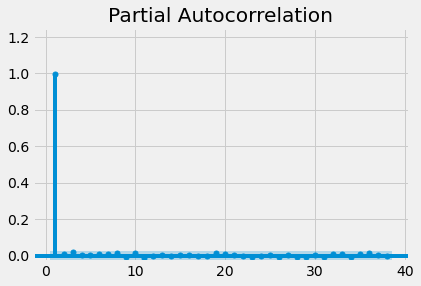

In [38]:
plot_pacf(spx_df,zero = False, auto_ylims = True);

### ARIMA(1,1,1)

In [42]:
arima_111 = ARIMA(spx_df,order = (1,1,1)) 
arima_result_111 = arima_111.fit()
arima_result_111.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    spx   No. Observations:                 6277
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -25249.679
Date:                Fri, 11 Nov 2022   AIC                          50505.357
Time:                        18:30:09   BIC                          50525.591
Sample:                    01-07-1994   HQIC                         50512.368
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6389      0.062     10.333      0.000       0.518       0.760
ma.L1         -0.6951      0.057    -12.204      0.000      -0.807      -0.583
sigma2       182.8286      1.741    104.999      0.000     179.416     186.241
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):              7041.27
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               1.43   Skew:                            -0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
residual111 = arima_result_111.resid

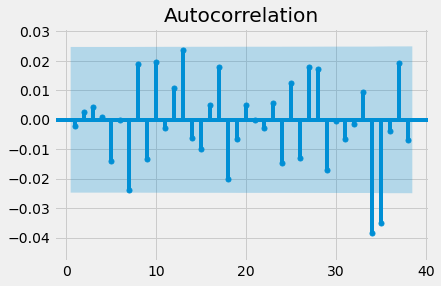

In [50]:
plot_acf(residual111,zero = False, auto_ylims = True);

In [46]:
arima_112 = ARIMA(spx_df,order = (1,1,2)) 
arima_result_112 = arima_112.fit()
arima_113 = ARIMA(spx_df,order = (1,1,3)) 
arima_result_113 = arima_113.fit()
arima_211 = ARIMA(spx_df,order = (2,1,1)) 
arima_result_211 = arima_211.fit()
arima_311 = ARIMA(spx_df,order = (3,1,1)) 
arima_result_311 = arima_311.fit()
arima_312 = ARIMA(spx_df,order = (3,1,2)) 
arima_result_312 = arima_312.fit()

C:\Users\vasee\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [48]:
print('ARIMA112 LLR = ',arima_result_112.llf,'\tARIMA112 AIC =',arima_result_112.aic)
print('ARIMA113 LLR = ',arima_result_113.llf,'\tARIMA113 AIC =',arima_result_113.aic)
print('ARIMA211 LLR = ',arima_result_211.llf,'\tARIMA211 AIC =',arima_result_211.aic)
print('ARIMA311 LLR = ',arima_result_311.llf,'\tARIMA311 AIC =',arima_result_311.aic)
print('ARIMA312 LLR = ',arima_result_312.llf,'\tARIMA312 AIC =',arima_result_312.aic)

ARIMA112 LLR =  -25249.54574645305 	ARIMA112 AIC = 50507.0914929061
ARIMA113 LLR =  -25249.54994180533 	ARIMA113 AIC = 50509.09988361066
ARIMA211 LLR =  -25249.545261464034 	ARIMA211 AIC = 50507.09052292807
ARIMA311 LLR =  -25249.543592894464 	ARIMA311 AIC = 50509.08718578893
ARIMA312 LLR =  -25254.561078763214 	ARIMA312 AIC = 50521.12215752643


Arima 311 performs compairatively well

<AxesSubplot:xlabel='date'>

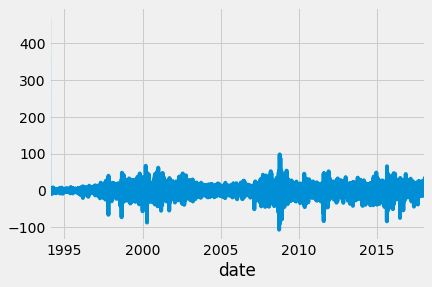

In [49]:
resid311 = arima_result_311.resid
resid311.plot()

In [ ]:
plot_acf(residual111,zero = False, auto_ylims = True);

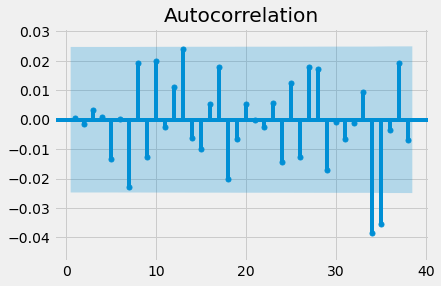

In [51]:
plot_acf(resid311,zero = False, auto_ylims = True);

## ARIMAX

In [52]:
arima_111spx = ARIMA(spx_df,exog=ftse_df,order = (1,1,1)) 
arima_result_111spx = arima_111.fit()
arima_result_111spx.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    spx   No. Observations:                 6277
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -24056.580
Date:                Fri, 11 Nov 2022   AIC                          48121.160
Time:                        22:29:27   BIC                          48148.138
Sample:                    01-07-1994   HQIC                         48130.507
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ftse           0.1375      0.002     88.068      0.000       0.134       0.141
ar.L1          0.0398      0.024      1.643      0.100      -0.008       0.087
ma.L1         -0.3493      0.022    -15.782      0.000      -0.393      -0.306
sigma2       125.0016      1.265     98.850      0.000     122.523     127.480
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              5113.98
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               1.04   Skew:                            -0.25
Prob(H) (two-sided):                  0.41   Kurtosis:                         7.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# SARIMAX

In [53]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [63]:
sarimax_model = SARIMAX(spx_df,exog=ftse_df,order = (1,0,1),seasonal_order=(2,0,1,5)) 
sarima_result = sarimax_model.fit()
sarima_result.summary()

C:\Users\vasee\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\vasee\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\vasee\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                               spx   No. Observations:                 6277
Model:             SARIMAX(1, 0, 1)x(2, 0, 1, 5)   Log Likelihood              -24066.643
Date:                           Sun, 13 Nov 2022   AIC                          48147.286
Time:                                   19:11:04   BIC                          48194.499
Sample:                               01-07-1994   HQIC                         48163.644
                                    - 01-29-2018                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ftse           0.1383      0.002     90.816      0.000       0.135       0.141
ar.L1          0.9998      0.000   3650.832      0.000       0.999       1.000
ma.L1         -0.3140      0.007    -44.383      0.000      -0.328      -0.300
ar.S.L5        0.9770      0.009    111.690      0.000       0.960       0.994
ar.S.L10       0.0229      0.009      2.626      0.009       0.006       0.040
ma.S.L5       -0.9991      0.002   -508.307      0.000      -1.003      -0.995
sigma2       125.3641      1.300     96.416      0.000     122.816     127.913
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              5108.64
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               1.03   Skew:                            -0.25
Prob(H) (two-sided):                  0.46   Kurtosis:                         7.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## AUTO ARIMA


In [60]:
order = auto_arima(returns)

In [62]:
order

ARIMA(order=(1, 0, 1), scoring_args={}, suppress_warnings=True)

In [61]:
oder.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 6276
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -9658.301
Date:                Sun, 13 Nov 2022   AIC                          19324.603
Time:                        19:07:22   BIC                          19351.581
Sample:                    01-10-1994   HQIC                         19333.950
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0127      0.005      2.486      0.013       0.003       0.023
ar.L1          0.6374      0.046     13.989      0.000       0.548       0.727
ma.L1         -0.7035      0.041    -17.081      0.000      -0.784      -0.623
sigma2         1.2712      0.010    125.917      0.000       1.251       1.291
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):             20263.76
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                            -0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""